**será que funcionou?**

## Problema 5:

Uma unidade de operação tem como um dos produtos o ácido acético, você precisa saber a capacidade calorifica ($C_P$) do produto (a pressão constante). A equação abaixo nos dá um modelo de $C_P$ em função de $T$.

$$C_P= 2,0142 + 56,0646 \cdot 10^{-9}T + 34,088 \cdot 10^{-6}T^2$$

$$[C_P]=Cal \cdot g^{-1}mol^{-1}K^{-1}$$

Use o comando ***input*** para criar uma interface para um operador que dá a temperatura(ºC) do processo e que ***imprime*** $C_p$ para ele.

*De um contexto para o cálculo desse Cp. O que tá acontecendo nesse processo? Dica: tenta concatenar isso com a entalpia, que é geralmente pro que se usa Cp. Essa entalpia pode ser usada pro quê? Balanço de energia?*

In [1]:
T_Celsius = float(input("T(ºC) = "))
T_Kelvin = T_Celsius + 273.15
Cp = 2.0142 + 56.0646*10**-9*T_Kelvin + 34.088*10**-6*T_Kelvin**2
print ("Cp = " + str(Cp) + "  Cal/(g mol K)")

T(ºC) = 0
Cp = 4.557552440225489  Cal/(g mol K)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

[Método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler) explícito para resolver um problema de valor inicial (PVI):

$$ y'(t) = f(t, y) $$  
$$ y_{_0}(t) = t_{_0} $$  
$$ y_{n+1} = y_n + \Delta y $$  
$$ \Delta y = \lim_{\Delta t \to 0} y'(t) \Delta t = \lim_{\Delta t \to 0} f(t, y) \Delta t $$  
$$ y_{n+1} \approx y_n + f(t, y) \cdot \Delta t $$

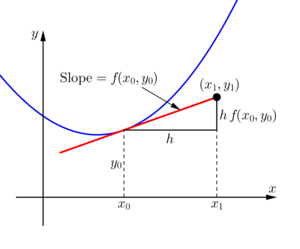

[Método Runge-Kutta](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta) 4º ordem para resolver um problema de valor inicial (PVI):

- Se f for apenas função de t, você pode resolver derivando normalmente.

$$ y'(t) = f(t, y)$$  
$$y_{_0}(t) = t_{_0}$$   
$$y_{n+1} = y_n + {h \over 6}(k_1 + 2k_2 + 2k_3 + k_4)$$  
$$k_1 = f(t_n, y_n)$$  
$$k_2 = f \Bigg (t_n + {h \over 2}, y_n + {h \over 2} k_1 \Bigg) $$  
$$k_3 = f \Bigg (t_n + {h \over 2}, y_n + {h \over 2} k_2 \Bigg) $$  
$$k_4 = f (t_n + h, y_n + h k_3) $$

In [3]:
ts = contrario([-x/10000 for x in range(1, 10001)]) + [x/10000 for x in range(1, 10001)]
ts2 = [x/50 for x in range (1000)]
ts3 = [x/0.5 for x in range (10)]
f = lambda t, y: np.sin(t)**2*y**0.5

def eulerexplicito(f, y0, ts): #explícito significa que o próprio y_n+1 não depende dele mesmo em f(t, y).
    ys = [y0]
    for i in range(1, len(ts)):
        h = ts[i] - ts[i-1]
        y = ys[i-1] + f(ts[i-1], ys[i-1])*h
        ys.append(y)
    return ys    
    
def rungekutta(f, y0, ts):   
    ys = [y0]
    for i in range(1, len(ts)):
        h = ts[i] - ts[i-1]        
        k1 = f(ts[i-1], ys[i-1]) # note a semelhança com o Euler explícito
        k2 = f(ts[i-1] + h/2, ys[i-1] + h*k1/2)
        k3 = f(ts[i-1] + h/2, ys[i-1] + h*k2/2)
        k4 = f(ts[i-1] + h, ys[i-1] + h*k3)
        
        y = ys[i-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
        ys.append(y)
    
    return ys

#note que nenhum dos métodos usa ts[n], porque isso iria servir p/
#prever y[n+1] e as listas ficariam com tamanhos diferentes. 

euler = eulerexplicito(f, 1, ts2)
rkodeint = odeint(f, 1, ts2, tfirst = True)
rkhomebrew = rungekutta(f, 1, ts2)
euler2 = eulerexplicito(f, 1, ts3)
rkodeint2 = odeint(f, 1, ts3, tfirst = True)
rkhomebrew2 = rungekutta(f, 1, ts3)

fig = plt.figure(figsize = (13, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(ts2, euler)
grafico.plot(ts2, rkodeint)
grafico.plot(ts2, rkhomebrew, ':', c = 'black')
grafico.plot(ts3, euler2)
grafico.plot(ts3, rkodeint2)
grafico.plot(ts3, rkhomebrew2, ':', c = 'purple')
grafico.legend(('euler', 'rk odeint', 'rk homebrew', 'euler2', 'rk odeint2', 'rk homebrew2'))

NameError: name 'contrario' is not defined

Questão 2 - Prova Final de Operações Unitárias I (EQE-473) - Ricardo Peçanha.
Uma resina troca-íons ( 𝜌𝑠=2,75𝑔/𝑐𝑚3 ,  𝜙=0,74 ) úmida será submetida a secagem em leito fluidizado com ar pré-aquecido a 80 ºC. O vaso disponível para o serviço é cilíndrico com diâmetro de 2,0 m e deverá operar aberto para a atmosfera. Calcular a potência do soprador (em HP) necessária para secar 6,5 ton da resina com o triplo da velocidade superficial correspondente à mínima fluidização. Suponha que o rendimento eletromecânico do soprador é 75 %. A análise de peneiras das partículas da resina é dada abaixo.

Observação: Numa primeira aproximação, suponha que o ar é incompressível e despreze os efeitos das trocas de calor e massa sobre as propriedades físicas da resina e do ar durante a secagem.

<table>
    <thead>
        <tr>
            <th>Mesh (Tyler)</th>
            <th>Massa (g)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>-24 +32</td>
            <td>90</td>
        </tr>  
        <tr>
            <td>-32 +42</td>
            <td>280</td>
        </tr>
        <tr>
            <td>-42 +60</td>
            <td>150</td>
        </tr>
        <tr>
            <td>-60 + 80</td>
            <td>70</td>
        </tr>
    </tbody>
</table>

Como fazer:

1º - Calcular o Diâmetro Médio de Partícula (de Sauter):
O que está na coluna "Mesh (Tyler)" significa da peneira pela qual uma partícula passa ("-") e a peneira na que ela fica retida ("+"), na série de peneiras granulométricas do experimento. Consultando a referência, para converter esse tamanho de "mesh" para "mm" temos que:

<table>
    <thead>
        <tr>
            <th>Mesh (Tyler)</th>
            <th>d(mm)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>24</td>
            <td>0.707</td>
        </tr>  
        <tr>
            <td>32</td>
            <td>0.5</td>
        </tr>
        <tr>
            <td>42</td>
            <td>0.354</td>
        </tr>
        <tr>
            <td>60</td>
            <td>0.25</td>
        </tr>
        <tr>
            <td>80</td>
            <td>0.177</td>
        </tr>
    </tbody>
</table>

## Problema 4:

É muito comum na otimização de um processo, o critério econômico ser o decisivo, optando-se processo mais barato sempre que possível. Entretanto, o mais barato nem sempre atende todos os requerimentos necessários para que um projeto possa ser colocado em funcionamento. Por exemplo, um processo de produção de ácido sulfúrico sem uma etapa de tratamento do efluente gasoso muito rígida é certamente mais barata que um processo que contém esta etapa; entretanto, ele não vai poder ser colocado em operação porque o nível de emissão de $SO_x$ será muito mais alto do que aceitado pela legislação. Dessa forma, projetos reais muitas vezes são otimizados por dois ou mais pontos de vistas: um econômico e as variáveis de fronteira, que vão delimitar os limites operacionais do projeto. Pré-requisitos de segurança, ambientais, da qualidade do produto, etc. colocarão limites à otimização pela variável econômica. Uma vez que o limite está bem definido, aí sim, então, a condição definida visará o maior custo-benefício.

Na indústria dos elementos de terras-raras (ETR), um lixiviado de monazita, rico nos ETRs leves, é comumente separado em duas frações de elementos: 
                                        **Fração Leve     |     Samário + Fração Pesada.** 

Um pré-requisito que delimita a fronteira econômica, é a pureza do rafinado ou da fase orgânica carregada, obtida no processo de separação. Essas são as condições que qualificam uma fronteira para otimização do ponto de vista econômico:

- Se o processo for uma extração, o rafinado deve ter pureza da fração leve superior à 99.5% E a recuperação da fração leve na fase aquosa deve ser maior que 70%.
- Se o processo for uma lavagem, o rafinado deve ter uma pureza da fração leve superior à 99.5% OU a fase orgânica não deve ser composta por mais que 0.5% da fração leve.
    
Crie uma função que receba o tipo processo, a pureza do rafinado, a recuperação da fração leve e a quantidade da fração leve na fase orgânica e que diz se o processo deve ser está adequado para ser analisado do ponto de vista econômico.

In [4]:
def avalia_condicao(processo, pureza_raf, rec, leve_org):
    if (
        processo == 'extração' and pureza_raf >= 0.995 and rec >= 0.7 or 
        processo == 'lavagem' and (pureza_raf >= 0.995 or leve_org <= 0.005)
       ):
        return 'viável'
    else:
        return 'inviável'

tire os parênteses de "(pureza_raf >= 0.995 or leve_org <= 0.005)" e teste para avalia_condicao('extração', 0.9, 0.69, 0.0001). Você consegue explicar por que isso acontece?

R: Ele vai enxergar o "processo == 'lavagem' and pureza_raf >= 0.995" como uma coisa só antes de passar para o operador OR, porque o AND tem precedência sobre ele. Logo, tudo do lado direito de OR que seja verdadeiro vai passar a validar a condição inteira, o que não acontece quando os parênteses estão presentes.

troque "processo == 'lavagem'" por "not processo == 'extração'" e teste para avalia_condicao('extração', 0.9, 0.69, 0.0001) e para avalia_condicao('lavagem', 0.9, 0.69, 0.01) e para avalia_condicao('qualquercoisa', 0.9, 0.69, 0.01). Você consegue explicar por que isso acontece?

R: O operador NOT muda o valor de uma afirmação para seu oposto (Se V, então F; se F, então V) e é lido primeiro que AND. Logo, o fato de não ser uma extração é lido como verdadeiro. Os parênteses contém uma recuperação de 0.0001 que também qualifica o OR como verdadeiro. V AND V é lido, por último, o que é V. Se trocamos 0.0001 por 0.01, temos V AND F, o que é F. "not processo == 'extração'" não significa "processo == 'lavagem'", pode ser também "processo == 'qualquercoisa'" ou "processo == 'qualqueroutracoisa'".

troque "not processo == 'extração' and (pureza_raf >= 0.995 or leve_org <= 0.005)" por "not (processo == 'extração' and (pureza_raf >= 0.995 or leve_org <= 0.005)). Teste para avalia_condicao('lavagem', 0.9, 0.69, 0.01)". Você consegue explicar porque isso acontece?

R: Agora o NOT é lido por último, e o valor final só será verdadeiro se o valor no parênteses for falso. Como o processo não é uma extração, ele já falsifica o AND para qualquer falte de pureza, recuperação e fração leve no orgânico. A negação do FALSE é TRUE, então o projeto de mostra como viável, apesar de isso ser absurdo.

Lição do dia:

𝑁𝑂𝑇>𝐴𝑁𝐷>𝑂𝑅
 
USE PARÊNTESES.

## Problema 1: (Loop For)

In [1]:
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import matplotlib.colors as colors
import matplotlib.cbook as cbook                                

aegl1 = 30 #mg/m³
aegl2 = 160 #mg/m³
aegl3 = 1100 #mg/m³

x1s = [i for i in np.logspace(0, 4, 300)]
y1s = [i for i in np.logspace(0, 3, 300)]
y2s = [-i for i in np.logspace(0, 3, 300)]

X1s, Y1s = np.meshgrid(x1s, y1s)
X2s, Y2s = np.meshgrid(x1s, y2s)
Concentracoes1 = concentracao(X1s, Y1s)
Concentracoes2 = concentracao(X2s, Y2s)
Concentracoes1 = ma.masked_where(Concentracoes1 < 10, Concentracoes1)
Concentracoes2 = ma.masked_where(Concentracoes2 < 10, Concentracoes2)
gambiarra1, gambiarra2 = np.meshgrid(np.array([0, 1]), np.array([0, 1]))


fundo = plt.figure(figsize = (14, 10))
contorno = fundo.add_subplot(1, 1, 1)

gambiarra = contorno.contourf(gambiarra1, gambiarra2, gambiarra2, cmap = cm.Blues, 
                              levels = [aegl1, aegl2, aegl3])
metadeSuperior = contorno.contourf(X1s, Y1s, Concentracoes1, cmap = cm.Blues,
                                   norm=colors.LogNorm(vmin=aegl1, vmax=aegl3), levels = [aegl1, aegl2, aegl3, 1e6])
metadeInferior = contorno.contourf(X2s, Y2s, Concentracoes2, cmap = cm.Blues, 
                                   norm=colors.LogNorm(vmin=aegl1, vmax=aegl3), levels = [aegl1, aegl2, aegl3, 1e6])
contorno.set_ylabel('Y')
contorno.set_xlabel('X')
contorno.set_title("Azul Claro > AEGL1 \t \t \t Azul > AEGL2  \t \t \t Azul Escuro > AEGL3")
contorno.set_ylim(-2000, 2000)
contorno.set_xlim(0, 10000)
cb = fundo.colorbar(gambiarra, ax=contorno)

NameError: name 'concentracao' is not defined